# Diamonds-Final Project Mini Example

This notebook provides some example code of a ML analysis in python.

Please note, additional analysis and EDA may be required above and beyond what is presented here. 

Overview:
- Load Data
- Initial EDA
- Feature Generation
- Train-test split
- Run Analysis
- Interpret results

In [1]:
# Silence Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data

In [102]:
# import packages
import pandas as pd
import seaborn as sns
import skimpy

In [103]:
# see built in datasets
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [104]:
# load data
df = sns.load_dataset('diamonds')

### Read in from csv or excel file

```python
df = pd.read_csv('../path/to/file.csv')
df = pd.read_excel('../path/to/file.xlsx')
```

In [105]:
# view data
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Initial Data Analysis

Key points:
* Number of rows
* Number of cols
    * Number of continous variables
    * Number of categorical variables
* Percent of missing data

Identify your outcome variable and predictor variables

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [107]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [108]:
from skimpy import skim
skim(df)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types               Categories                  │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩          │
│ │ Number of rows    │ 53940  │ │ float64     │ 6     │ │ cut                   │          │
│ │ Number of columns │ 10     │ │ category    │ 3     │ │ color                 │          │
│ └───────────────────┴────────┘ │ int64       │ 1     │ │ clarity               │          │
│                                └─────────────┴───────┘ └───────────────────────┘          │
│                                          number                                           │
│ ┏━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃       ┃ missin ┃ comple ┃ mean   ┃ sd     ┃ p0    ┃ p25   ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┃       ┃ g      ┃ te     ┃        ┃        ┃       ┃       ┃        ┃        ┃        ┃  │
│ ┃       ┃        ┃ rate   ┃        ┃        ┃       ┃       ┃        ┃        ┃        ┃  │
│ ┡━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ carat │ 0.0    │ 1.0    │ 0.8    │ 0.47   │ 0.2   │ 0.4   │ 1.0    │ 5.0    │ █▃     │  │
│ │ depth │ 0.0    │ 1.0    │ 62.0   │ 1.4    │ 43.0  │ 61.0  │ 62.0   │ 79.0   │   ▂█   │  │
│ │ table │ 0.0    │ 1.0    │ 57.0   │ 2.2    │ 43.0  │ 56.0  │ 59.0   │ 95.0   │  █▁    │  │
│ │ price │ 0.0    │ 1.0    │ 3900.0 │ 4000.0 │ 330.0 │ 950.0 │ 5300.0 │ 19000. │ █▃▁▁   │  │
│ │       │        │        │        │        │       │       │        │ 0      │        │  │
│ │ x     │ 0.0    │ 1.0    │ 5.7    │ 1.1    │ 0.0   │ 4.7   │ 6.5    │ 11.0   │   ██▂  │  │
│ │ y     │ 0.0    │ 1.0    │ 5.7    │ 1.1    │ 0.0   │ 4.7   │ 6.5    │ 59.0   │ █      │  │
│ │ z     │ 0.0    │ 1.0    │ 3.5    │ 0.71   │ 0.0   │ 2.9   │ 4.0    │ 32.0   │ █      │  │
│ └───────┴────────┴────────┴────────┴────────┴───────┴───────┴────────┴────────┴────────┘  │
│                                         category                                          │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃               ┃ missing       ┃ complete rate           ┃ ordered       ┃ unique     ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ cut           │ 0.0           │ 1.0                     │ False         │ 5.0        │  │
│ │ color         │ 0.0           │ 1.0                     │ False         │ 7.0        │  │
│ │ clarity       │ 0.0           │ 1.0                     │ False         │ 8.0        │  │
│ └───────────────┴───────────────┴─────────────────────────┴───────────────┴────────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

### Drop Missing Values

To drop rows which have missing data, run the following:

```python
    df2 = df.dropna()
```

Note: This returns a **new** dataframe

## Define X and y for analysis

* Recode categorical variables as numeric
    * Cut
    * Color
    * Clarity
    
* Predicting on carat (y)


In [109]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [110]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

<AxesSubplot:>

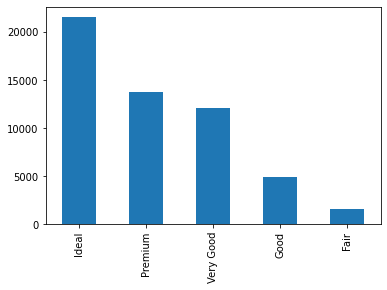

In [111]:
df.cut.value_counts().plot(kind='bar')

In [112]:
def recode_cut(series):
    if series == 'Fair':
        return 0
    elif series == 'Good':
        return 1
    elif series == 'Very Good':
        return 2
    elif series == 'Premium':
        return 3
    else:
        return 4

In [113]:
df['cutR'] = df.cut.apply(recode_cut)

In [114]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

<AxesSubplot:>

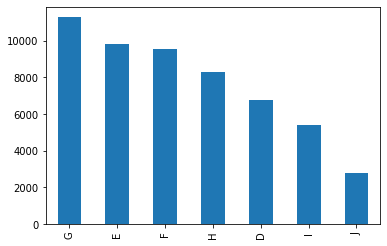

In [115]:
df.color.value_counts().plot(kind='bar')

In [116]:
def recode_color(series):
    if series == 'G':
        return 0
    elif series == 'E':
        return 1
    elif series == 'F':
        return 2
    elif series == 'H':
        return 3
    elif series == 'D':
        return 4
    elif series == 'I':
        return 5
    else:
        return 6

In [117]:
df['colorR'] = df.color.apply(recode_color)

In [118]:
df.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

<AxesSubplot:>

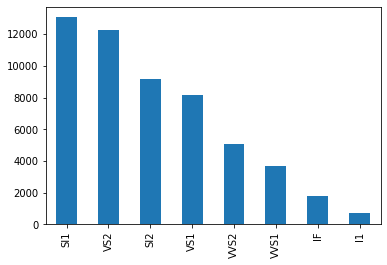

In [119]:
df.clarity.value_counts().plot(kind='bar')

In [120]:
# Recode into dummy variables-Drops IF as first
clarity_dummies = pd.get_dummies(df['clarity'], drop_first=True)

In [121]:
clarity_dummies.head()

,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0


In [122]:
df = pd.concat([df, clarity_dummies],axis=1)

In [123]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cutR,colorR,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,4,1,0,0,0,0,0,1,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,1,0,0,0,0,1,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1,0,0,1,0,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5,0,0,0,1,0,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6,0,0,0,0,0,1,0


### Select X and y, train-test split data

In [124]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'cutR', 'colorR', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2',
       'I1'],
      dtype='object')

In [125]:
X = df[['depth', 'table', 'price', 'x', 'y', 'z', 'cutR', 'colorR', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']]

In [126]:
y = df['carat']

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [130]:
rfr = RandomForestRegressor()

In [131]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

## Predict and Compute Model Metrics

In [132]:
y_pred = rfr.predict(X_test)

<AxesSubplot:xlabel='carat'>

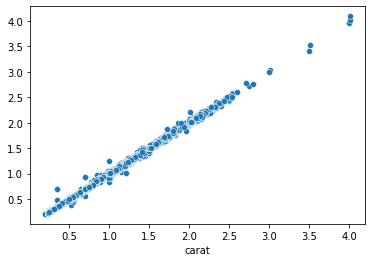

In [133]:
sns.scatterplot(y_test, y_pred)

In [134]:
from sklearn.metrics import r2_score

In [135]:
r2_score(y_test, y_pred)

0.9991379924728578

In [136]:
feat_import = pd.DataFrame()
feat_import['Values'] = rfr.feature_importances_
feat_import.index = rfr.feature_names_in_

<AxesSubplot:>

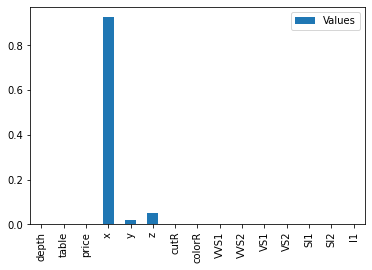

In [137]:
feat_import.plot(kind='bar')

### Explain Results and Analysis

This analysis used a random forest regressor to predict diamond carat ratings based on 'depth', 'table', 'price', 'x', 'y', 'z', 'cutR', 'colorR', and clarity recoded into dummy variables. 

The model fit well with the data as observed in the scatterplot comparing predicted to actual carat values. The r2 score for the test data was .99. Overall this project shows promise for predicting diamond carat values from its other features.

The most important feature in prediction was `x` as shown in the feature importances plot. 

## Clasification Example

Predict cut based on other features

In [76]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'cutR', 'colorR', 'clarityR', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1',
       'SI2', 'I1'],
      dtype='object')

In [77]:
X2 = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'colorR', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']]

In [78]:
y2 = df['cut']

In [79]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rfc = RandomForestClassifier()

In [82]:
rfc.fit(X_train2, y_train2)

RandomForestClassifier()

In [83]:
y_preds2 = rfc.predict(X_test2)

In [84]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


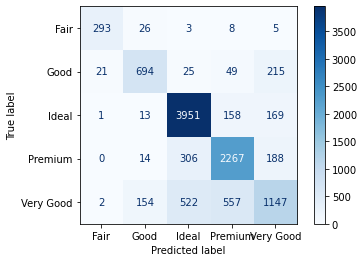

In [85]:
plot_confusion_matrix(rfc, X_test2, y_test2, cmap='Blues')

In [86]:
from sklearn.metrics import classification_report

In [87]:
report = classification_report(y_test2, y_preds2)

In [88]:
print(report)

              precision    recall  f1-score   support

        Fair       0.92      0.87      0.90       335
        Good       0.77      0.69      0.73      1004
       Ideal       0.82      0.92      0.87      4292
     Premium       0.75      0.82      0.78      2775
   Very Good       0.67      0.48      0.56      2382

    accuracy                           0.77     10788
   macro avg       0.79      0.76      0.77     10788
weighted avg       0.77      0.77      0.77     10788



### Feature Importances

In [89]:
rfc.feature_importances_

array([0.05611703, 0.21263798, 0.26165033, 0.10076486, 0.10776924,
       0.10137457, 0.08067721, 0.03811378, 0.00402711, 0.00528861,
       0.00730384, 0.00790103, 0.00829499, 0.00617402, 0.00190542])

In [90]:
rfc.feature_names_in_

array(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'colorR',
       'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'], dtype=object)

[Text(0, 0, 'carat'),
 Text(1, 0, 'depth'),
 Text(2, 0, 'table'),
 Text(3, 0, 'price'),
 Text(4, 0, 'x'),
 Text(5, 0, 'y'),
 Text(6, 0, 'z'),
 Text(7, 0, 'colorR'),
 Text(8, 0, 'VVS1'),
 Text(9, 0, 'VVS2'),
 Text(10, 0, 'VS1'),
 Text(11, 0, 'VS2'),
 Text(12, 0, 'SI1'),
 Text(13, 0, 'SI2'),
 Text(14, 0, 'I1')]

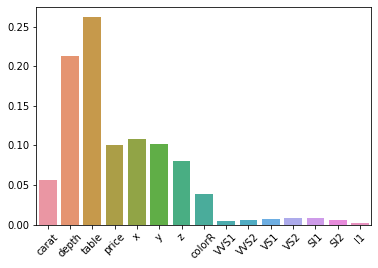

In [95]:
g =sns.barplot(x=rfc.feature_names_in_, y=rfc.feature_importances_)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

## Explain your analysis and results!

This project predicted diamond cut from 'carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'colorR', and clarity recoded into dummy variables. 

The accuracy for the test data was 79%. The feature importances show that table was the most important predictor, followed by depth. 

Overall results suggest that all features are useful in determining diamond cut.